In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
%pip install tabulate
# pd.options.display.float_format = '{:,.2f}'.format

Note: you may need to restart the kernel to use updated packages.


In [54]:
df = pd.read_csv ('annual-national-electricity-generation-total-and-hydrogenera.csv')
print(df)

    elect_gen  year  gw_hours
0   total_net  1974   20175.8
1   total_net  1975   20120.3
2   total_net  1976   21220.4
3   total_net  1977   21792.4
4   total_net  1978   21854.5
..        ...   ...       ...
75      hydro  2009   23975.6
76      hydro  2010   24492.7
77      hydro  2011   24868.4
78      hydro  2012   22673.6
79      hydro  2013   22815.4

[80 rows x 3 columns]


In [55]:
df.head()

,elect_gen,year,gw_hours
0,total_net,1974,20175.8
1,total_net,1975,20120.3
2,total_net,1976,21220.4
3,total_net,1977,21792.4
4,total_net,1978,21854.5


In [56]:
df.tail()

,elect_gen,year,gw_hours
75,hydro,2009,23975.6
76,hydro,2010,24492.7
77,hydro,2011,24868.4
78,hydro,2012,22673.6
79,hydro,2013,22815.4


In [57]:
df.shape

(80, 3)

In [58]:
df.dtypes

elect_gen     object
year           int64
gw_hours     float64
dtype: object

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   elect_gen  80 non-null     object 
 1   year       80 non-null     int64  
 2   gw_hours   80 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.0+ KB


In [60]:
df.describe()

,year,gw_hours
count,80.000000,80.000000
mean,1993.500000,27359.800000
std,11.616226,8137.887698
min,1974.000000,14573.000000
25%,1983.750000,21871.150000
50%,1993.500000,24341.650000
75%,2003.250000,33525.125000
max,2013.000000,43405.600000


## Colors

- #0E5C26 wind, renewable
- #F5BF22 solar
- #AC59C1 geothermal, waste heat (renewable)
- #5294F6 hydro
- #F57D34 bioenergy, wood
- #A17F40 oil
- #6E6E6E coal 
- #AD362D gas

In [61]:
graph_style = 'Solarize_Light2'
# graph_style = 'ggplot'
# graph_style = 'seaborn-whitegrid'

wind  = '#0E5C26'
solar = '#F5BF22'
geo   = '#AC59C1'
hydro = '#5294F6'
bio   = '#F57D34'
oil   = '#A17F40'
coal  = '#6E6E6E'
gas   = '#AD362D'

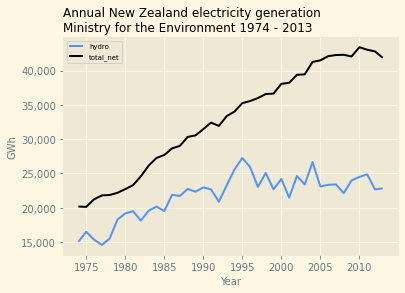

In [62]:
with plt.style.context(style=graph_style):
    df.pivot(columns='elect_gen', index='year', values='gw_hours').plot(kind='line',
                                                        ylabel= 'GWh',
                                                        linewidth=2,
                                                        color=[hydro,'black'])

    plt.xlabel('Year', fontsize='medium')
    plt.ylabel('GWh', fontsize='medium')
    plt.legend(loc = 'upper left', fontsize='x-small')
    plt.title('Annual New Zealand electricity generation \nMinistry for the Environment 1974 - 2013',
              fontsize='large', loc='left')
    plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
    
plt.show()

In [63]:
# grouping the data
df_gp = df.groupby(['elect_gen','year'])['gw_hours'].mean()
print(df_gp)

elect_gen  year
hydro      1974    15037.0
           1975    16497.0
           1976    15344.0
           1977    14573.0
           1978    15503.0
                    ...   
total_net  2009    42063.9
           2010    43405.6
           2011    43041.8
           2012    42797.5
           2013    41867.3
Name: gw_hours, Length: 80, dtype: float64


In [64]:
df_gp=df_gp.unstack(level='elect_gen')
df_gp.head()

elect_gen,hydro,total_net
year,,
1974,15037.0,20175.8
1975,16497.0,20120.3
1976,15344.0,21220.4
1977,14573.0,21792.4
1978,15503.0,21854.5


In [65]:
df_gp["ratio_hydro_total"] = (df_gp["hydro"] / df_gp["total_net"])
df_gp.head()

elect_gen,hydro,total_net,ratio_hydro_total
year,,,
1974,15037.0,20175.8,0.745299
1975,16497.0,20120.3,0.819918
1976,15344.0,21220.4,0.723078
1977,14573.0,21792.4,0.668719
1978,15503.0,21854.5,0.709373


In [66]:
list(df_gp)

['hydro', 'total_net', 'ratio_hydro_total']

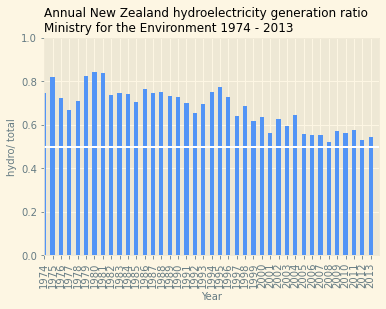

In [81]:
with plt.style.context(style=graph_style):
    #plt.bar(df_gp['elect_gen']['year'], df_gp['ratio_hydro_total'], color=hydro)
    df_gp['ratio_hydro_total'].plot.bar(color=hydro)
    plt.title('Annual New Zealand hydroelectricity generation ratio\nMinistry for the Environment 1974 - 2013',
              fontsize='large', loc='left')
    plt.axhline(y=.5, color='white')
    plt.ylim(top=1)
    plt.xlim((0, 40))
    plt.xlabel('Year', fontsize='medium')
    plt.ylabel('hydro/ total', fontsize='medium')
    #plt.xticks(size='x-small', rotation=90)

plt.show()

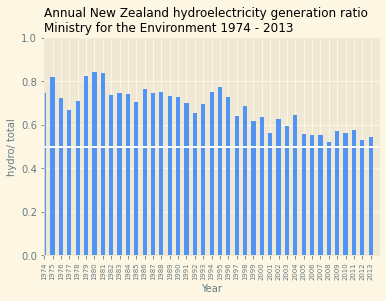

In [82]:
with plt.style.context(style=graph_style):
    df_gp['ratio_hydro_total'].plot.bar(color=hydro)
    plt.title('Annual New Zealand hydroelectricity generation ratio\nMinistry for the Environment 1974 - 2013',
              fontsize='large', loc='left')
    plt.axhline(y=.5, color='white')
    plt.ylim(top=1)
    plt.xlim((0, 40))
    plt.xlabel('Year', fontsize='medium')
    plt.ylabel('hydro/ total', fontsize='medium')
    plt.xticks(size='x-small', rotation=90)

plt.show()

In [ ]:
print(df_gp.to_markdown(floatfmt=",.2f"))